# **Etude du Papier de Recherche: *A Unified Framework for U-Net Design and Analysis***

Ce notebook s’inscrit dans le cadre du projet de la matière Generative models & Simulation du master MS2A de Sorbonne Université et a pour objectif d’analyser de manière rigoureuse l’article de recherche **“A Unified Framework for U-Net Design and Analysis”**, qui propose un cadre mathématique unifié pour la conception, l’interprétation et l’analyse des architectures de type U-Net.

L’objectif principal de ce travail est double :

- **Comprendre et formaliser** les principes théoriques sous-jacents aux architectures U-Net, en les replaçant dans un cadre abstrait fondé sur des opérateurs d’encodage, de décodage et de projections multi-échelles.
- **Adopter une approche algorithmique**, en traduisant ce cadre unifié en une implémentation concrète, simplifiée mais fidèle à l’esprit de l’article, afin d’en illustrer les apports sur des données synthétiques contrôlées.

Dans cette optique, le notebook est structuré de manière progressive. Il débute par une présentation détaillée du problème étudié et des limites des approches classiques. Il introduit ensuite la définition formelle du U-Net telle que proposée par les auteurs, avant d’en extraire les idées clés et les intuitions théoriques essentielles. Enfin, une implémentation algorithmique est proposée et analysée expérimentalement, permettant d’évaluer l’influence des choix architecturaux et des hyperparamètres.

Ce travail vise ainsi à établir un lien clair entre **théorie, architecture et pratique**, en mettant en évidence ce qui est central dans le cadre unifié proposé, tout en restant accessible et reproductible.

**Auteurs:** Pierre Fontbonne & Erwan Ouabdesselam

## **1. Contexte et problématique de l’article**

### **1.1. Pourquoi s’intéresser aux architectures U-Net ?**

L’article prend pour objet d’étude les architectures de type U-Net, devenues centrales dans de nombreuses applications du deep learning où l’entrée et la sortie partagent une structure spatiale comparable. Leur usage dépasse aujourd’hui largement le cadre initial de la segmentation d’images et concerne également des tâches de reconstruction, de débruitage ou certains modèles génératifs.

Le point clé mis en avant par les auteurs est le rôle fondamental joué par la structure multi-échelles des U-Nets. La combinaison d'une phase de réduction de résolution et d'une phase de reconstruction permet de capturer à la fois des informations globales et locales. Les skip connections entre niveaux de résolution comparables assurent la transmission d’informations fines, souvent cruciales pour la qualité de la sortie.

Cependant, cette compréhension reste en grande partie qualitative. L’article s’inscrit dans le constat que, malgré leur efficacité empirique, les U-Nets sont rarement analysés comme des objets mathématiques à part entière, ce qui limite la compréhension de leurs mécanismes essentiels.


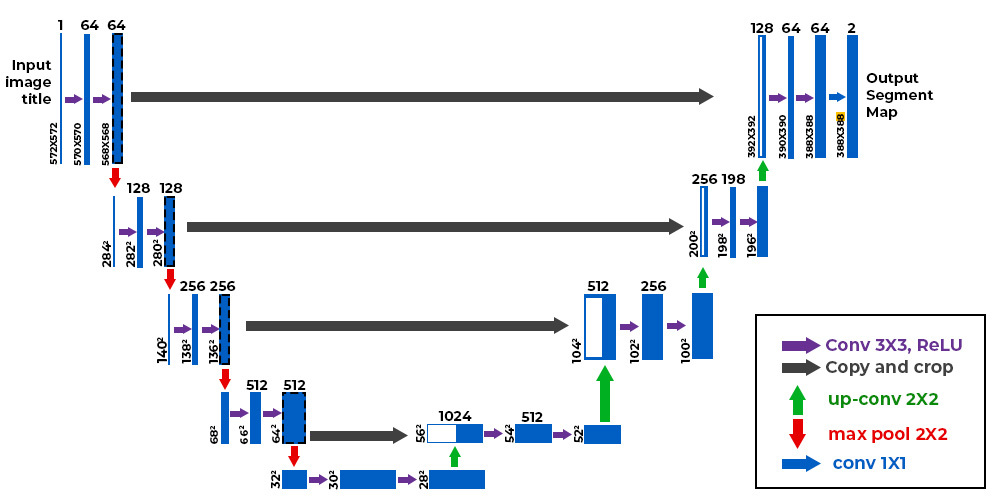



### **1.2. Problème étudié dans l’article**

Le problème central abordé par les auteurs peut être formulé comme suit : comment définir et analyser rigoureusement les architectures de type U-Net, indépendamment des choix d’implémentation spécifiques, afin d’en dégager des propriétés structurelles fondamentales ?

Plus précisément, l’article cherche à construire un cadre mathématique permettant :
- de donner une définition abstraite des U-Nets,
- de comparer différentes variantes sur une base commune,
- et d’analyser leur comportement lorsque la résolution augmente ou que la structure multi-échelles se raffine.

Cette démarche vise à dépasser une description purement architecturale pour accéder à une compréhension plus théorique de ces modèles.



### **1.3. Types de données et cadres applicatifs**

Le cadre proposé dans l’article est formulé de manière suffisamment générale pour s’appliquer à des situations où les données peuvent être vues comme des fonctions ou des champs définis sur un domaine $X$. Cette abstraction permet d’englober aussi bien des données discrétisées sur des grilles régulières (images, volumes) que des domaines plus généraux.

Les tâches considérées incluent notamment :
- la segmentation et la reconstruction,
- le débruitage,
- l’apprentissage d’opérateurs entre espaces fonctionnels, comme dans certains problèmes de modélisation de PDE,
- ainsi que des applications aux modèles génératifs, en particulier les modèles de diffusion.

Ce choix de généralité est central dans la démarche des auteurs, car il permet de dissocier la structure du U-Net du cadre discret dans lequel il est souvent implémenté.

### **1.4. Limites des approches existantes**

Avant ce travail, l’analyse des architectures U-Net souffre principalement de l’absence d’un formalisme commun. Les comparaisons entre variantes reposent le plus souvent sur des critères d’implémentation, sans permettre d’identifier clairement les mécanismes mathématiques responsables de leurs performances.

De plus, les résultats théoriques existants sont souvent fragmentaires et spécifiques à certains cas particuliers. Il manque un langage unifié permettant de relier la structure multi-échelles des U-Nets à des propriétés telles que la stabilité, l’auto-similarité ou le comportement asymptotique en haute résolution.

Enfin, les formulations classiques supposent fréquemment des domaines standards, ce qui limite l’intégration explicite de contraintes géométriques ou physiques pourtant centrales dans de nombreuses applications scientifiques.



### **1.5. Contributions principales de l’article**

L’article apporte plusieurs contributions majeures qui structurent la suite de ce notebook.

Premièrement, les auteurs proposent une définition mathématique rigoureuse des architectures de type U-Net, permettant de mettre en évidence leur structure d’auto-similarité et d’étudier leur comportement en régime de haute résolution. Ce cadre permet également d’établir un lien formel avec les ResNets.

Deuxièmement, l’article introduit la classe des **Multi-ResNets**, construites sur des hiérarchies de sous-espaces d’ondelettes orthogonales. Dans ces architectures, l’encodeur est fixé par le choix de la base fonctionnelle, ce qui permet d’injecter explicitement des informations géométriques ou physiques dans le modèle.

Enfin, les auteurs analysent les modèles de diffusion dans une base de Haar et montrent que les composantes de haute fréquence sont dominées par le bruit plus rapidement que les basses fréquences. Cette analyse fournit une justification théorique de l’usage d’opérations de type average pooling dans les U-Nets employés pour les modèles de diffusion.

## **2. Cadre méthodologique proposé**

Nous commençons par rappeler la définition formelle d’un U-Net telle qu’elle est formulée dans l’article.

### **Définition de l'architecture U-Net** 

Soient $V$ et $W$ des espaces mesurables.  
Un **U-Net** $\mathcal{U} = (\mathcal{V}, \mathcal{W}, \mathcal{E}, \mathcal{D}, \mathcal{P}, U_0)$ est défini par les six composantes suivantes :

1. **Sous-espaces d’encodage**  
   $\mathcal{V} = (V_i)_{i=0}^{\infty}$ est une suite croissante de sous-ensembles de $V$ telle que
   $$
   \lim_{i \to \infty} V_i = V.
   $$

2. **Sous-espaces de décodage**  
   $\mathcal{W} = (W_i)_{i=0}^{\infty}$ est une suite croissante de sous-ensembles de $W$ telle que
   $$
   \lim_{i \to \infty} W_i = W.
   $$

3. **Opérateurs d’encodage**  
   $\mathcal{E} = (E_i)_{i=0}^{\infty}$, où
   $$
   E_i : V_i \to V_i,
   $$
   et l’on note
   $$
   E_i(v_i) = \tilde{v}_i.
   $$

4. **Opérateurs de décodage**  
   $\mathcal{D} = (D_i)_{i=1}^{\infty}$, où
   $$
   D_i : W_{i-1} \times V_i \to W_i,
   $$
   et l’on note
   $$
   D_i(w_{i-1} \mid v_i).
   $$
   La composante $v_i$ est appelée la **connexion de saut** (*skip connection*).

5. **Opérateurs de projection**  
   $\mathcal{P} = (P_i)_{i=0}^{\infty}$, où
   $$
   P_i : V \to V_i,
   $$
   tels que
   $$
   P_i(v_i) = v_i \quad \text{pour tout } v_i \in V_i.
   $$

6. **Goulot d’étranglement (bottleneck)**  
   $U_0$ est l’application
   $$
   U_0 : V_0 \to W_0,
   $$
   qui permet une représentation compressée de l’entrée.

Le U-Net à la résolution $i$ est l’application
$$
U_i : V_i \to W_i
$$
définie récursivement par
$$
U_i(v_i) = D_i\bigl(U_{i-1}(P_{i-1}(\tilde{v}_i)) \mid \tilde{v}_i\bigr),
\qquad i = 1, 2, \ldots
$$

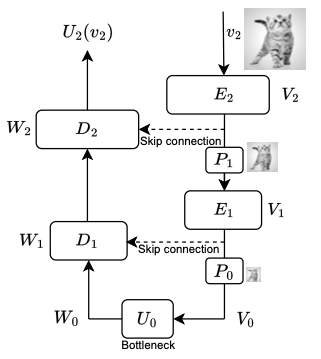

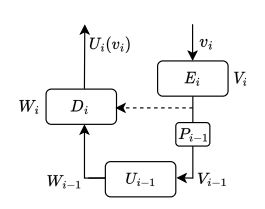

**Lecture et interprétation de la définition.**  
La Définition 1 proposée dans l’article fournit une description abstraite des architectures de type U-Net, indépendante des choix d’implémentation concrets. Elle permet en particulier de raisonner sur les U-Nets comme des opérateurs agissant entre des espaces structurés par niveaux de résolution, plutôt que comme de simples assemblages de blocs convolutifs.

Un point central de cette définition est l’introduction explicite de suites d’espaces $(V_i)$ et $(W_i)$, qui matérialisent la notion de résolution finie. Dans l’interprétation proposée par les auteurs, un U-Net ne travaille jamais directement sur les espaces continus $V$ et $W$, mais sur des approximations successives de ces espaces. Cette formulation rend explicite le caractère multi-échelles de l’architecture et permet d’envisager les U-Nets comme des approximations d’opérateurs définis sur des espaces fonctionnels.

La définition clarifie également le rôle distinct des différents opérateurs. Les opérateurs d’encodage et de projection organisent le passage entre résolutions, tandis que les opérateurs de décodage apprennent la reconstruction progressive de la sortie, en s’appuyant sur les informations transmises par les skip connections. Cette dissociation permet de dépasser la vision symétrique encodeur-décodeur souvent utilisée dans les descriptions classiques.

Enfin, la relation récursive définissant les opérateurs $U_i$ met en évidence une structure auto-similaire : chaque niveau du U-Net s’appuie sur le précédent pour affiner l’approximation à une résolution plus fine. Cette organisation, interprétée dans l’article comme une forme de préconditionnement par sous-espaces, joue un rôle clé dans l’analyse théorique proposée et prépare les liens établis ultérieurement avec d’autres architectures, notamment les ResNets.

(Est ce qu'on parle de la partie high resolution scaling ???)

### **Lien entre U-Nets et architectures résiduelles**
Un autre apport conceptuel important du cadre proposé est la mise en évidence d’un lien formel entre les architectures de type U-Net et les réseaux résiduels (ResNets). Les auteurs montrent qu’à chaque niveau de résolution, un U-Net peut être interprété comme un réseau résiduel, dont l’approximation est construite relativement au U-Net de résolution inférieure.

Dans cette lecture, le modèle apprend principalement une correction résiduelle associée au passage à une résolution plus fine, tandis que l’approximation grossière fournie par le niveau inférieur joue le rôle de référence. Cette interprétation fournit une justification théorique à l’usage fréquent de blocs résiduels dans les encodeurs et décodeurs des U-Nets modernes.

Ce point de vue met en évidence que les U-Nets ne se réduisent pas à une simple structure encodeur–décodeur, mais peuvent être compris comme des architectures hiérarchiques, dans lesquelles l’apprentissage s’organise comme une succession de corrections multi-échelles.

### Choix des sous-espaces d’encodage comme a priori de modélisation

L’article met en évidence un point qui n’apparaît pas dans les descriptions architecturales classiques : le choix des sous-espaces d’encodage $\mathcal V$ constitue en lui-même un a priori de modélisation. Ce choix fixe une représentation multi-échelles initiale sur laquelle le U-Net opère, indépendamment de tout apprentissage.

Dans cette perspective, l’encodeur n’est pas chargé de construire la décomposition multi-échelles, mais d’en corriger les défauts lorsque celle-ci n’est pas parfaitement adaptée au problème considéré. Cela explique pourquoi les encodeurs sont naturellement modélisés comme des opérateurs résiduels, et pourquoi, dans le cas limite des Multi-ResNets, l’encodeur peut être réduit à l’identité, toute la structure multi-échelles étant imposée par le choix de $\mathcal V$.





Importance des skip connections 

Importance du precoditionning

Importance du choix de la base 

# Expériences sur données synthétiques 1D  
## Validation contrôlée de mécanismes architecturaux (cadre U-Net)

Avant d’aborder des applications sur données réelles, cette section propose une étude sur signaux synthétiques 1D afin d’analyser, dans un cadre contrôlé, l’impact de certains choix architecturaux mis en avant dans l'article.

L’objectif n’est pas d’optimiser les performances sur une tâche réaliste, mais d’isoler et de comparer des mécanismes précis dans un contexte simple et interprétable.

### Objectifs des expériences

Les expériences menées visent à évaluer empiriquement :

1. **L’effet des connexions résiduelles**, interprétées comme l’apprentissage d’une correction par rapport à une approximation initiale.

2. **Le rôle du préconditionnement**, introduit pour améliorer le conditionnement du problème inverse et faciliter l’optimisation.

3. **Une comparaison quantitative cohérente**, en évaluant l’ensemble des modèles sur un même jeu de test synthétique, strictement identique.

Cette analyse se place dans une logique de validation de principes architecturaux, en lien direct avec les hypothèses du papier, plutôt que dans une démarche de comparaison de performances absolues.

In [1]:
# imports + device
import torch
import matplotlib.pyplot as plt
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

from src.data.signal_1d import Signal1DConfig, generate_pair, Signal1DDataModule
from src.models.regressors import MLPResNet, DenoiserOperator


Chaque paire de données est générée selon le modèle de bruit additif suivant :

$$[
Y = X + \varepsilon, 
\qquad \varepsilon \sim \mathcal{N}(0, \sigma_{\text{noise}}^2 I)
]$$

où $( X \in \mathbb{R}^L )$ est le signal propre et $Y$ son observation bruitée.

La tâche d’apprentissage correspond à un **problème de débruitage**, formulé comme une régression visant à reconstruire $X$ à partir de $Y$.

### Structure des signaux propres

Les signaux propres sont construits comme une superposition de composantes élémentaires, activables indépendamment :

- **composantes globales lisses** : somme de sinusoïdes (basses fréquences),
- **discontinuités intermédiaires** (*steps*, optionnelles),
- **événements localisés** (*spikes*, optionnels).

Cette construction permet de générer des signaux contenant simultanément des structures globales et locales, ce qui constitue un cadre adapté à l’étude d’architectures multi-échelle de type U-Net.


La classe `Signal1DConfig` permet de contrôler explicitement la difficulté et la structure du problème inverse.

Les paramètres principaux sont :
- `L` : longueur du signal,
- `sigma_noise` : niveau de bruit additif,
- `use_steps` : activation des discontinuités,
- `use_spikes` : activation des événements localisés,
- `do_standardize` : standardisation du signal propre.

Cette paramétrisation modulaire permet de générer des jeux de données adaptés aux mécanismes étudiés, tout en garantissant des comparaisons équitables entre architectures.


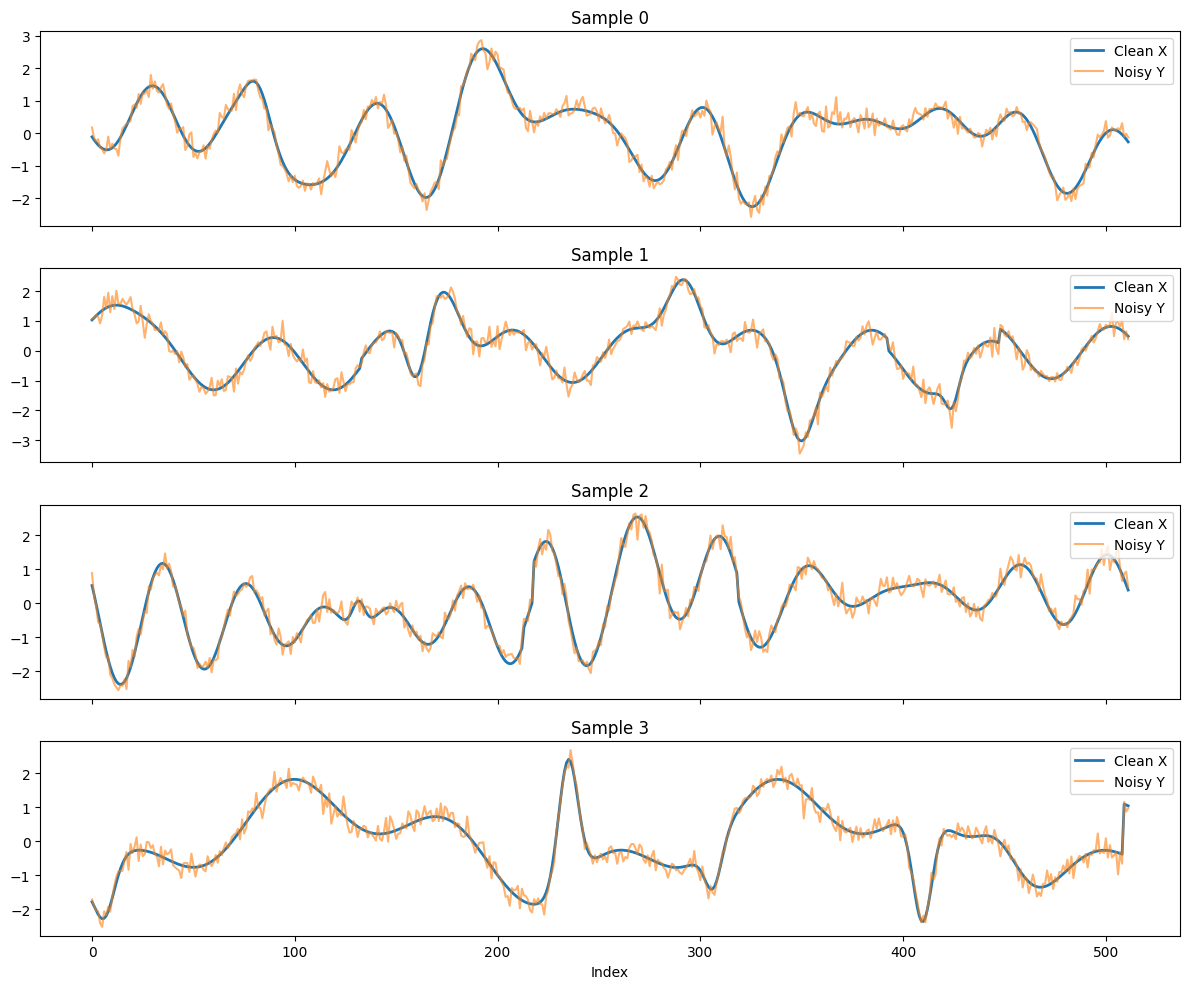

In [2]:
# Visualize multiple generated samples to illustrate signal diversity

cfg = Signal1DConfig(
    L=512,
    sigma_noise=0.2,
    use_steps=True,
    use_spikes=True,
    do_standardize=True,
)

n_samples = 4
fig, axes = plt.subplots(n_samples, 1, figsize=(12, 2.5 * n_samples), sharex=True)

for i in range(n_samples):
    x, y = generate_pair(cfg, seed=i)

    ax = axes[i]
    ax.plot(x.numpy(), label="Clean X", linewidth=2)
    ax.plot(y.numpy(), label="Noisy Y", alpha=0.6)
    ax.set_title(f"Sample {i}")
    ax.legend(loc="upper right")

plt.xlabel("Index")
plt.tight_layout()
plt.show()

In [ ]:
# Création du Dataset 
dm = Signal1DDataModule(
    batch_size=8,
    n_train=100,
    n_val=20,
    n_test=20,
    L=cfg.L,
    sigma_noise=cfg.sigma_noise,
    use_steps=cfg.use_steps,
    use_spikes=cfg.use_spikes,
    do_standardize=cfg.do_standardize,
    seed=0,
    num_workers=0, 
)

dm.setup("fit")

' \nbatch = next(iter(dm.train_dataloader()))\ny_b, x_b = batch\nprint("Batch shapes (Y, X):", y_b.shape, x_b.shape)\n'

## Modèles entraînés

### 1) Backbone commun : une fonction $f_\theta$
Les trois variantes partagent exactement le même réseau $f_\theta$, implémenté par `MLPResNet` (un MLP à blocs résiduels) :

- entrée : $Y \in \mathbb{R}^L$ (signal bruité),
- sortie : un vecteur dans $\mathbb{R}^L$,
- rôle : produire une **correction** ou un **résidu** selon le mode choisi.

L’objectif est d’isoler l’effet de l’“enveloppe” (baseline, résiduel, préconditionné) sans modifier la capacité du backbone.

### 2) Un opérateur unique capturant trois variantes
La classe `DenoiserOperator` encode trois formes d’opérateurs de reconstruction
$$
\hat X = \mathcal{T}_\theta(Y),
$$
qui ne diffèrent que par la manière dont la sortie du réseau est combinée avec l’entrée.

#### (a) Baseline : reconstruction directe
$$
\hat X = f_\theta(Y).
$$
Il s’agit de la référence la plus simple : l’ensemble du signal doit être reconstruit directement par le réseau.

#### (b) Résiduel : apprentissage d’une correction (skip identité)
$$
\hat X = Y + f_\theta(Y).
$$
Dans ce cas, le réseau apprend principalement une **correction** par rapport à l’opérateur identité.  
C’est l’analogue 1D le plus simple d’un *skip connection*, qui facilite l’optimisation en demandant au modèle d’expliquer essentiellement ce qui doit être corrigé.

#### (c) Préconditionné : reconstruction autour d’une approximation initiale
$$
\hat X = P(Y) + f_\theta(Y).
$$
Le terme $P(Y)$ joue le rôle de **préconditionneur** : il fournit une première estimation structurée du signal, tandis que le réseau apprend le complément.

Dans notre implémentation, $P$ est volontairement simple et interprétable :
- `identity` : $P(Y) = Y$ (cas résiduel),
- `ma` : $P(Y) = \mathrm{MA}(Y)$ (moyenne glissante), qui approxime une composante lisse et de basse fréquence.

### 3) Parallèle avec un U-Net (correction autour d’un niveau grossier)
Dans le papier, une interprétation centrale est qu’à chaque échelle, un U-Net peut être vu comme la somme de :
- une **approximation grossière** produite à plus basse résolution (préconditionneur),
- une **correction** apprise à cette échelle (résidu).

Le mode *preconditioned* reproduit exactement cette logique en version 1D :
- $P(Y)$ joue le rôle de la composante **grossière**,
- $f_\theta(Y)$ apprend la composante **fine** ou **résiduelle**.

Même si $P$ est ici une moyenne glissante (et non un encodeur multi-échelle complet), l’expérience permet de tester explicitement le mécanisme clé :
**apprendre une correction autour d’un opérateur initial raisonnable**, plutôt que de reconstruire le signal entièrement à partir de zéro.

In [ ]:
# Hydra/Lightning run from notebook (baseline)

!python main.py task@_global_=regression data=signal_1d model=denoiser_mlp \
  model.model.mode=baseline model.model.preconditioner=none output_id=signal1d_baseline

output_dir: .cache
output_id: signal1d_baseline
trainer:
  _target_: pytorch_lightning.Trainer
  max_epochs: 30
  accelerator: auto
  log_every_n_steps: 15
  enable_checkpointing: true
  callbacks:
  - _target_: pytorch_lightning.callbacks.EarlyStopping
    monitor: val_loss
    mode: min
    patience: 10
  - _target_: pytorch_lightning.callbacks.ModelCheckpoint
    monitor: val_loss
    mode: min
    save_top_k: 1
    dirpath: ./${output_dir}/checkpoints
    filename: ${now:%Y-%m-%d_%H-%M-%S}-epoch={epoch}-val_loss={val_loss:.6f}
model:
  _target_: models.RegressionModel
  model:
    _target_: models.DenoiserOperator
    mode: baseline
    preconditioner: none
    ma_kernel_size: 9
    net:
      _target_: models.MLPResNet
      input_dim: ${data.d}
      output_dim: ${data.d}
      hidden_dim: 128
      depth: 4
      dropout: 0.0
      use_layernorm: true
  loss:
    _target_: torch.nn.MSELoss
  optimizer:
    _target_: torch.optim.AdamW
    lr: 0.001
    weight_decay: 0.01
data:
  

In [ ]:

# Hydra/Lightning run from notebook (residual)
!python main.py task@_global_=regression data=signal_1d model=denoiser_mlp \
  model.model.mode=residual model.model.preconditioner=identity output_id=signal1d_residual

output_dir: .cache
output_id: signal1d_residual
trainer:
  _target_: pytorch_lightning.Trainer
  max_epochs: 30
  accelerator: auto
  log_every_n_steps: 15
  enable_checkpointing: true
  callbacks:
  - _target_: pytorch_lightning.callbacks.EarlyStopping
    monitor: val_loss
    mode: min
    patience: 10
  - _target_: pytorch_lightning.callbacks.ModelCheckpoint
    monitor: val_loss
    mode: min
    save_top_k: 1
    dirpath: ./${output_dir}/checkpoints
    filename: ${now:%Y-%m-%d_%H-%M-%S}-epoch={epoch}-val_loss={val_loss:.6f}
model:
  _target_: models.RegressionModel
  model:
    _target_: models.DenoiserOperator
    mode: residual
    preconditioner: identity
    ma_kernel_size: 9
    net:
      _target_: models.MLPResNet
      input_dim: ${data.d}
      output_dim: ${data.d}
      hidden_dim: 128
      depth: 4
      dropout: 0.0
      use_layernorm: true
  loss:
    _target_: torch.nn.MSELoss
  optimizer:
    _target_: torch.optim.AdamW
    lr: 0.001
    weight_decay: 0.01
data

In [ ]:

# Hydra/Lightning run from notebook (preconditioned: moving average)
!python main.py task@_global_=regression data=signal_1d model=denoiser_mlp \
  model.model.mode=preconditioned model.model.preconditioner=ma model.model.ma_kernel_size=9 \
  output_id=signal1d_precond_ma9

output_dir: .cache
output_id: signal1d_precond_ma9
trainer:
  _target_: pytorch_lightning.Trainer
  max_epochs: 30
  accelerator: auto
  log_every_n_steps: 15
  enable_checkpointing: true
  callbacks:
  - _target_: pytorch_lightning.callbacks.EarlyStopping
    monitor: val_loss
    mode: min
    patience: 10
  - _target_: pytorch_lightning.callbacks.ModelCheckpoint
    monitor: val_loss
    mode: min
    save_top_k: 1
    dirpath: ./${output_dir}/checkpoints
    filename: ${now:%Y-%m-%d_%H-%M-%S}-epoch={epoch}-val_loss={val_loss:.6f}
model:
  _target_: models.RegressionModel
  model:
    _target_: models.DenoiserOperator
    mode: preconditioned
    preconditioner: ma
    ma_kernel_size: 9
    net:
      _target_: models.MLPResNet
      input_dim: ${data.d}
      output_dim: ${data.d}
      hidden_dim: 128
      depth: 4
      dropout: 0.0
      use_layernorm: true
  loss:
    _target_: torch.nn.MSELoss
  optimizer:
    _target_: torch.optim.AdamW
    lr: 0.001
    weight_decay: 0.01
d

## Visualisation et étude des résultats
### Courbes train et validation (Lightning logs)

On trace les courbes à partir des `metrics.csv`.  
Attention : ignorer les versions qui correspondent à des tests anciens. Ici on fixe explicitement les versions utilisées.

Using cache_dir: ./.cache
Available versions: ['version_0', 'version_1', 'version_2', 'version_3', 'version_4']
Loaded: ./.cache/lightning_logs/version_2/metrics.csv


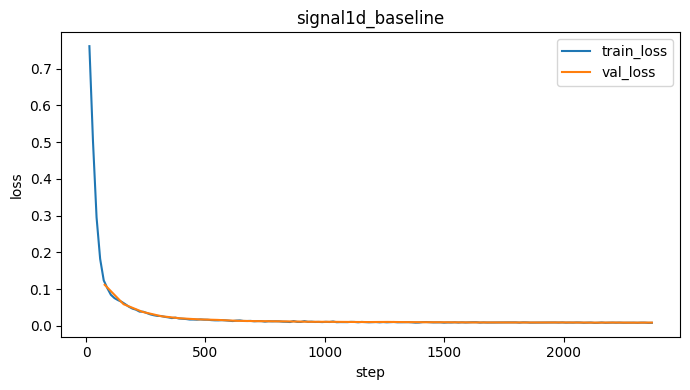

Loaded: ./.cache/lightning_logs/version_3/metrics.csv


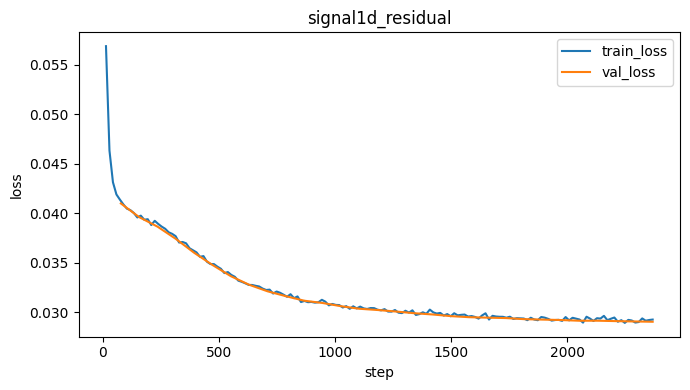

Loaded: ./.cache/lightning_logs/version_4/metrics.csv


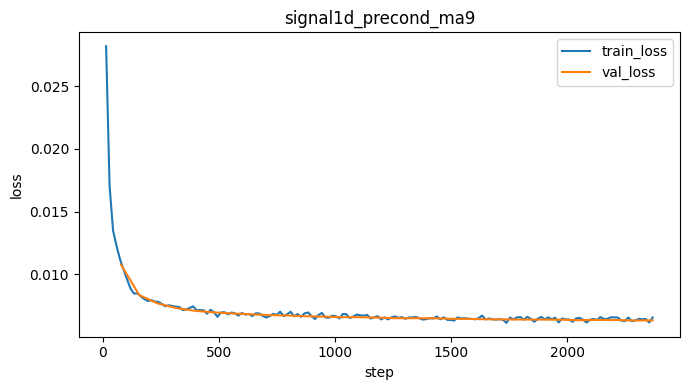

In [16]:
import os, glob
import pandas as pd
import matplotlib.pyplot as plt

RUNS = {
    "signal1d_baseline": None,
    "signal1d_residual": None,
    "signal1d_precond_ma9": None,
}

def find_cache_dir():
    candidates = ["./.cache", "./src/.cache"]
    for c in candidates:
        if os.path.isdir(c):
            return c
    raise FileNotFoundError("No .cache directory found (looked for ./.cache and ./src/.cache)")

def list_versions(cache_dir):
    base = os.path.join(cache_dir, "lightning_logs")
    if not os.path.isdir(base):
        raise FileNotFoundError(f"No lightning_logs directory found under {cache_dir}")
    versions = sorted(glob.glob(os.path.join(base, "version_*")))
    return [os.path.basename(v) for v in versions]

def load_metrics_csv(cache_dir, version):
    path = os.path.join(cache_dir, "lightning_logs", version, "metrics.csv")
    if not os.path.exists(path):
        raise FileNotFoundError(f"metrics.csv not found at {path}")
    return pd.read_csv(path), path

def plot_loss_curves(cache_dir, version, title=None):
    df, path = load_metrics_csv(cache_dir, version)
    print("Loaded:", path)

    df_train = df[["step", "train_loss"]].dropna()
    df_val = df[["step", "val_loss"]].dropna()

    plt.figure(figsize=(7, 4))
    plt.plot(df_train["step"].values, df_train["train_loss"].values, label="train_loss")
    plt.plot(df_val["step"].values, df_val["val_loss"].values, label="val_loss")
    plt.xlabel("step")
    plt.ylabel("loss")
    plt.title(title or f"Loss curves ({version})")
    plt.legend()
    plt.tight_layout()
    plt.show()

cache_dir = find_cache_dir()
print("Using cache_dir:", cache_dir)
print("Available versions:", list_versions(cache_dir))

# Exemple: tu choisis les versions à afficher
plot_loss_curves(cache_dir, "version_2", title="signal1d_baseline")
plot_loss_curves(cache_dir, "version_3", title="signal1d_residual")
plot_loss_curves(cache_dir, "version_4", title="signal1d_precond_ma9")

Questions à se poser :
- Pourquoi c'est un choix judicieux les ondelettes de Haar? 


Points à retenir du papier :
- Le U-Net peut être vu comme une forme réorganisée d’un ResNet. Autrement dit, le U-Net utilise une structure similaire au ResNet, mais adaptée pour la segmentation d’images en organisant les niveaux de résolution de manière plus structurée.

- Multi resnet


- Pour des images un bon choix de bases est les bases de Haar


- Pas capter la partie sur les PDE


Limites / ouvertures :
- Future work should hence investigate how to optimally choose V for a problem at hand

Sources :
- Image du unet :  https://datasciencetoday.net/index.php/fr/deep-learning/228-unet 